In [135]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pylt
import seaborn as sns
from scipy.stats import *
import math

# warning fixed for Soal 06
plt.rcParams.update({'figure.max_open_warning': 0})

# Pembacaan csv ke dalam variabel data
# Baris pertama tidak dijadikan header
datacsv = pd.read_csv("Gandum.csv", names=["Daerah", "SumbuUtama", "SumbuKecil", "Keunikan", "AreaBulatan", "Diameter", "KadarAir", "Keliling", "Bulatan", "Ransum", "Kelas"])
datacsv

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
4,4141,108.701191,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766960,2.197877,1
5,5273,122.747869,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
...,...,...,...,...,...,...,...,...,...,...,...
496,5083,120.083450,54.821580,0.889709,5179,80.447975,0.534827,286.377,0.778850,2.190441,2
497,4432,112.367050,51.294914,0.889726,4550,75.119889,0.601194,270.823,0.759344,2.190608,2
498,5020,119.873742,54.718545,0.889740,5104,79.947874,0.528421,285.799,0.772311,2.190733,2
499,4035,107.311728,48.930802,0.889996,4150,71.676506,0.584698,258.503,0.758791,2.193132,2


In [58]:
# Soal 1
# Mendapatkan nilai countnya 
# kemudian cari max dari count yang didapat tadi
# setelah nilai didapat ditambahkan ke dalam array modus
modus = []
for line in datacsv:
    modus.append(datacsv[line].value_counts().idxmax())

data = datacsv.describe().T
data["median"] = data["50%"]
data["modus"] = modus
data["variansi"] = datacsv.var()
data["range"] = datacsv.max() - datacsv.min()
data["skewness"] = datacsv.skew()
data["kurtosis"] = datacsv.kurt()
data

[4881, 99.01478925, 53.17603697, 0.90928407, 3802, 78.83325579, 0.824404762, 202.456, 0.7556490159999999, 1.901437269, 2]


,count,mean,std,min,25%,50%,75%,max,median,modus,variansi,range,skewness,kurtosis
Daerah,500.0,4801.246000,986.395491,2522.000000,4042.750000,4735.000000,5495.500000,7453.000000,4735.000000,4881.000000,9.729761e+05,4931.000000,0.238144,-0.434631
SumbuUtama,500.0,116.045171,18.282626,74.133114,104.116098,115.405140,129.046792,227.928583,115.405140,99.014789,3.342544e+02,153.795469,0.761529,4.330534
SumbuKecil,500.0,53.715246,4.071075,39.906517,51.193576,53.731199,56.325158,68.977700,53.731199,53.176037,1.657365e+01,29.071182,-0.010828,0.475568
Keunikan,500.0,0.878764,0.036586,0.719916,0.863676,0.890045,0.907578,0.914001,0.890045,0.909284,1.338528e-03,0.194085,-1.623472,2.917256
AreaBulatan,500.0,4937.048000,1011.696255,2579.000000,4170.250000,4857.000000,5654.250000,7720.000000,4857.000000,3802.000000,1.023529e+06,5141.000000,0.257560,-0.409685
Diameter,500.0,77.771158,8.056867,56.666658,71.745308,77.645277,83.648598,97.413830,77.645277,78.833256,6.491311e+01,40.747172,0.002725,-0.466455
KadarAir,500.0,0.648372,0.094367,0.409927,0.572632,0.626117,0.726633,0.878899,0.626117,0.824405,8.905149e-03,0.468972,0.493661,-0.740326
Keliling,500.0,281.479722,37.335402,197.015000,255.883000,280.045500,306.062500,488.837000,280.045500,202.456000,1.393932e+03,291.822000,0.733627,2.272685
Bulatan,500.0,0.761737,0.061702,0.174590,0.731991,0.761288,0.796361,0.904748,0.761288,0.755649,3.807194e-03,0.730158,-3.599237,29.975096
Ransum,500.0,2.150915,0.249767,1.440796,1.983939,2.193599,2.381612,2.464809,2.193599,1.901437,6.238350e-02,1.024013,-0.658188,-0.428656


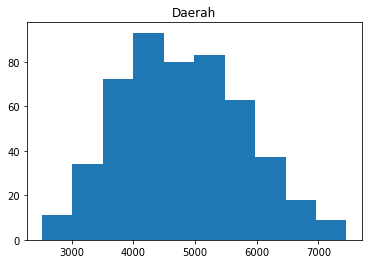

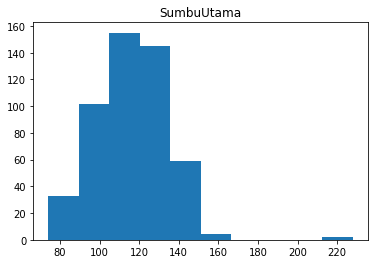

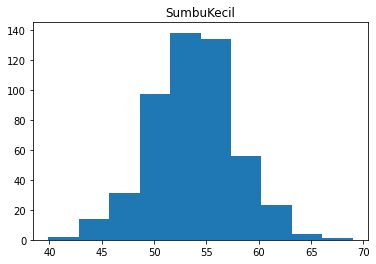

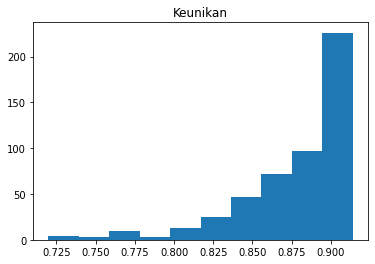

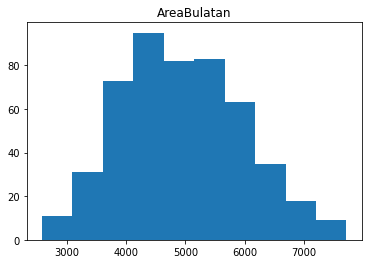

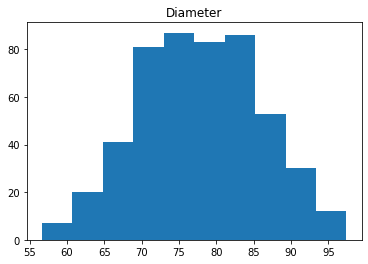

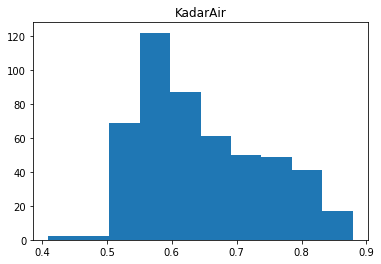

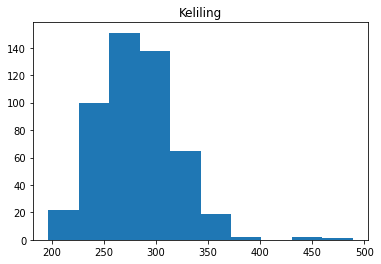

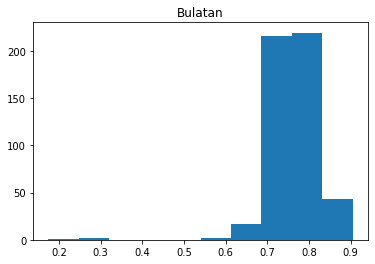

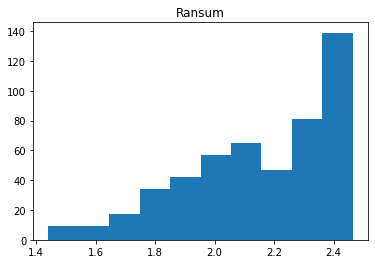

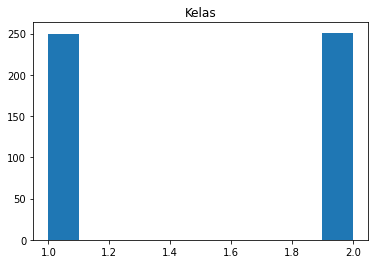

In [3]:
# Soal 2
# Histogram
for line in datacsv:
    pylt.figure()
    pylt.hist(datacsv[line])
    pylt.title(line)

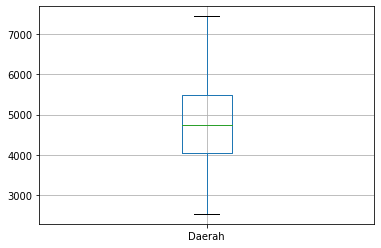

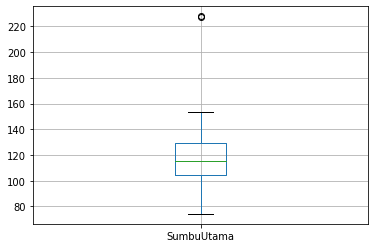

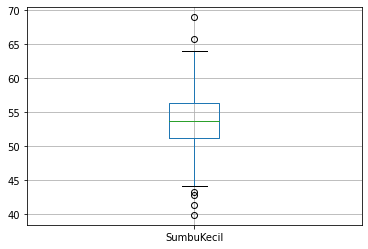

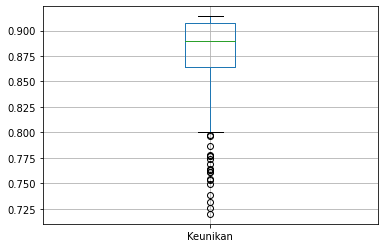

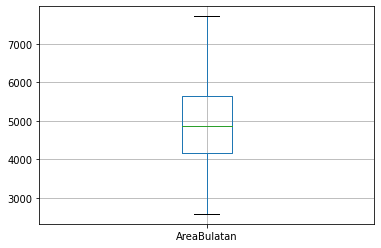

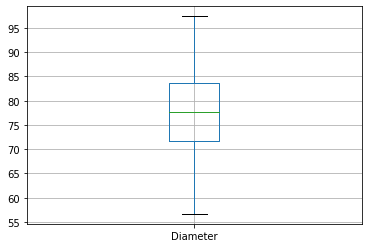

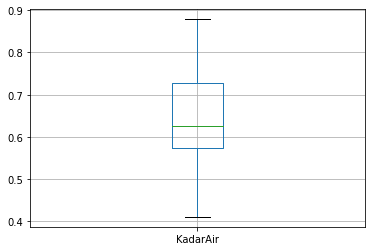

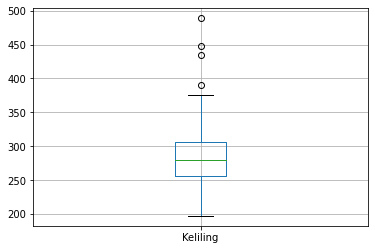

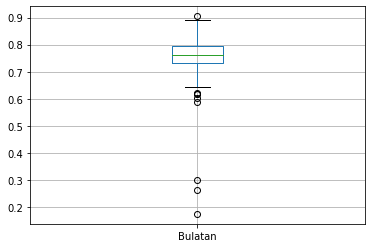

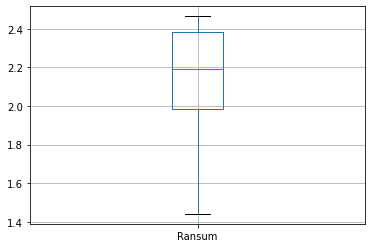

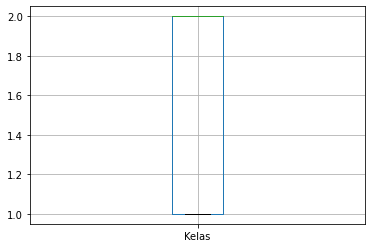

In [14]:
# Soal 2
# Box plot
for line in datacsv:
    pylt.figure()
    datacsv.boxplot([line])

c:\users\benidictus\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\benidictus\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\benidictus\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

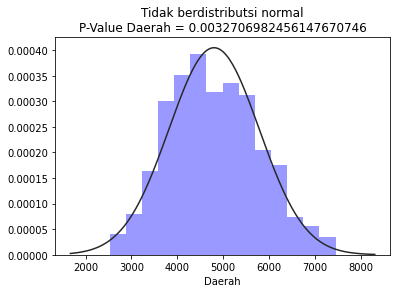

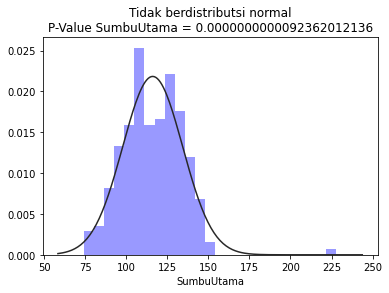

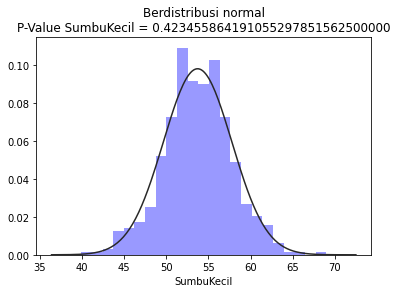

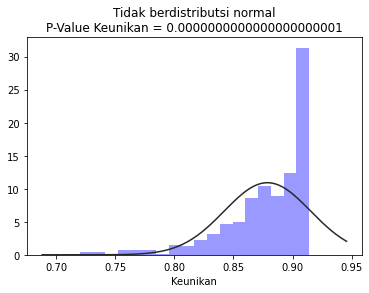

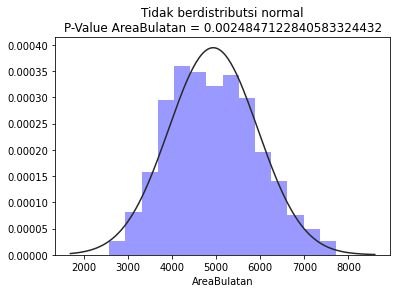

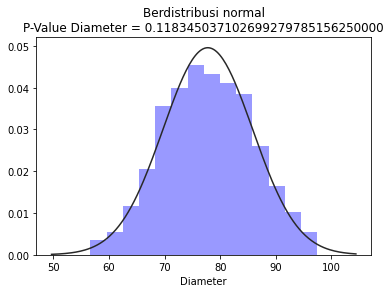

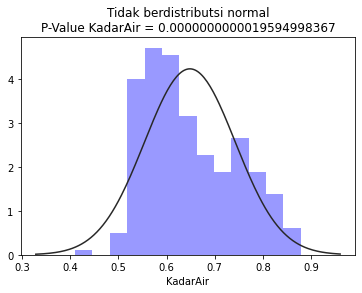

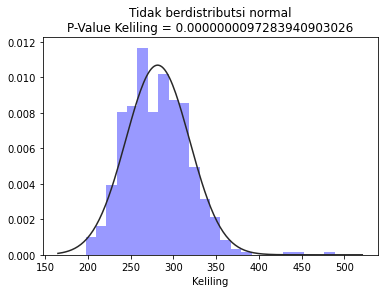

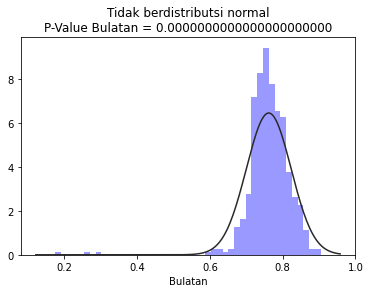

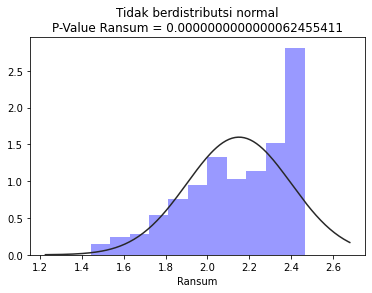

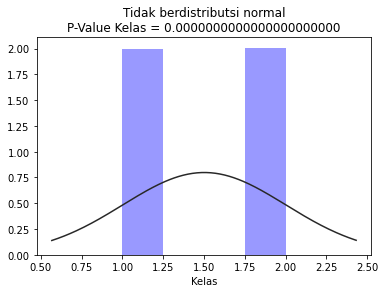

In [17]:
# Soal 3

### Keterkaitan dengan boxplot ######################################################
# Tabel akan berdistribusi normal jika:
# 1. Tidak ada titik pada diagram boxplot, gambar box harus tepat ditengah
# 2. Terdapat titik pada diagram boxplot, gambar box harus berada lebih condong
#    ke titik - titik yang lebih banyak. cth: SumbuKecil
# 
# Khusus untuk diagram Kelas tidak termasuk distribusi normal karena
# penyebaran nilai distribusinya tidak seimbang dan terlalu tinggi di satu nilai
#
###

for line in datacsv:
    pylt.figure()
    sns.distplot(datacsv[line], fit = norm, kde = False, hist = True, color = 'blue')
    
    # jika nilai P value lebih besar dari 0.05
    if(shapiro(datacsv[line])[1] > 0.05):
        pylt.title("Berdistribusi normal\n" + "P-Value " + line + " = " + str("%0.30f" %shapiro(datacsv[line])[1]))
    else:
        pylt.title("Tidak berdistributsi normal\n" + "P-Value " + line + " = " + str("%0.22f" %shapiro(datacsv[line])[1]))

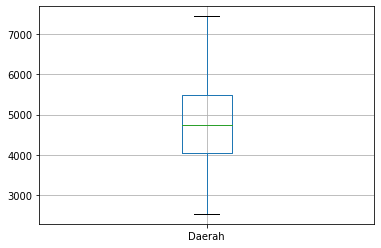

H0: miu = miu0
H1: miu > miu0
Tingkat signifikan = 0.05
Daerah kritis : 2.2951538242525173 > 1.64
z = 2.295
pVal = 0.011
Keputusan : Hipotesis H0 ditolak


In [165]:
# Soal 4
# a

# alpha
A = 0.05

miu0 = 4700
zA = 1.64

miu1 = datacsv['Daerah'].mean()
sd = datacsv['Daerah'].std()
n = len(datacsv.index)

z = (miu1 - miu0)/ (sd/math.sqrt(n))

datacsv.boxplot(['Daerah'])
pylt.show()

print("H0: miu = miu0")
print("H1: miu > miu0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " > " + str(zA))

pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.3f" % pVal)
print("Keputusan : ", end = '')

if(z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

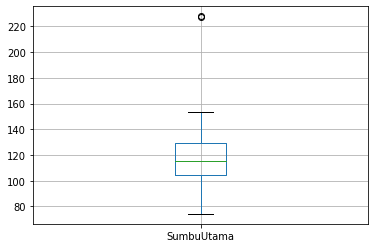

H0: miu = miu0
H1: miu <> miu0
Tingkat signifikan = 0.025
Daerah kritis : 0.05524712326731844 < -1.96 atau 0.05524712326731844 > 1.96
z = 0.055
pVal = 0.478
Keputusan : Hipotesis H0 diterima


In [168]:
# b
miu0 = 116
A = 0.025
zA = 1.96

miu1 = datacsv['SumbuUtama'].mean()
sd = datacsv['SumbuUtama'].std()
n = len(datacsv.index)

z = (miu1 - miu0)/ (sd/math.sqrt(n))

datacsv.boxplot(['SumbuUtama'])
pylt.show()

print("H0: miu = miu0")
print("H1: miu <> miu0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " <" + " -" + str(zA) + " atau " + str(z) + " > " + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.3f" % pVal)
print("Keputusan : ", end = '')

if(z < -zA or z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

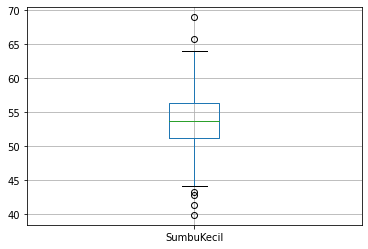

H0: miu = miu0
H1: miu <> miu0
Tingkat signifikan = 0.025
Daerah kritis : 6.6464610699610045 < -1.96 atau 6.6464610699610045 > 1.96
z = 6.646
pVal = 0.000
Keputusan : Hipotesis H0 ditolak


In [169]:
# c 
sample = []
sample = datacsv['SumbuKecil'][:20]

miu0 = 50
A = 0.025
zA = 1.96

hasil = sum(sample)
n = 20
miu1 = hasil/n
sd = np.std(sample)
z = (miu1 - miu0)/ (sd/math.sqrt(n))


datacsv.boxplot(['SumbuKecil'])
pylt.show()

print("H0: miu = miu0")
print("H1: miu <> miu0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " <" + " -" + str(zA) + " atau " + str(z) + " > " + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.3f" % pVal)
print("Keputusan : ", end = '')

if(z < -zA or z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

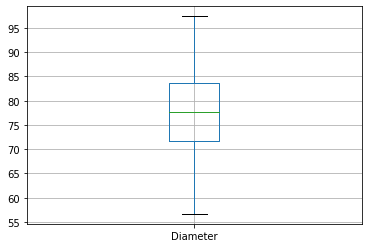

H0: p = p0
H1: p <> p0
Tingkat signifikan = 0.025
Daerah kritis : 2.7553868807746578 < -1.96 atau 2.7553868807746578 > 1.96
z = 2.755
pVal = 0.0029
Keputusan : Hipotesis H0 ditolak


In [171]:
# d
sample = []

for line in datacsv['Diameter']:
    if(line > 85): 
        sample.append(line)

p0 = 0.15
a = 0.025
zA = 1.96
x = len(sample)
n = len(datacsv.index)
temp = n * p0 * (1 - p0)

z = (x - (n*p0))/math.sqrt(temp)


datacsv.boxplot(['Diameter'])
pylt.show()

## binomial didekati normal
print("H0: p = p0")
print("H1: p <> p0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " <" + " -" + str(zA) + " atau " + str(z) + " > " + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.4f" % pVal)
print("Keputusan : ", end = '')

if(z < -zA or z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

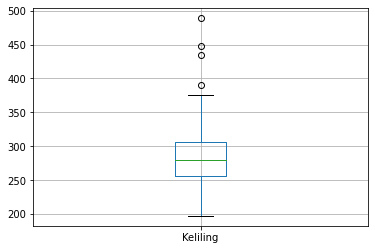

H0: p = p0
H1: p < p0
Tingkat signifikan = 0.025
Daerah kritis : -5.129891760425771 < -1.96
z = -5.130
pVal = 0.000000144954414
Keputusan : Hipotesis H0 ditolak


In [172]:
# e
sample = []

for line in datacsv['Keliling']:
    if(line < 100): 
        sample.append(line)

p0 = 0.05
a = 0.025
zA = 1.96
x = len(sample)
n = len(datacsv.index)
temp = n * p0 * (1 - p0)

z = (x - (n*p0))/math.sqrt(temp)

datacsv.boxplot(['Keliling'])
pylt.show()

## binomial didekati normal
print("H0: p = p0")
print("H1: p < p0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " <" + " -" + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.15f" % pVal)
print("Keputusan : ", end = '')

if(z < -zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

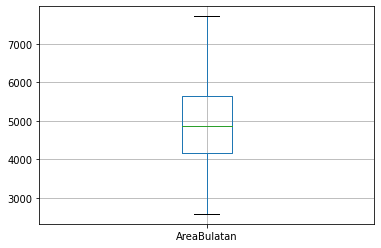

H0: miu1 - miu2 = d0
H1: miu1 - miu2 <> d0
Tingkat signifikan = 0.025
Daerah kritis : 17.04716514145827 < -1.96 atau 17.04716514145827 > 1.96
z = 17.047
pVal = 0.000000000000000
Keputusan : Hipotesis H0 ditolak


In [173]:
# Soal 5
# a
sample1 = []
sample2 = []
i = 0

for line in datacsv['AreaBulatan']:
    if(i < 250):
        sample1.append(line)
    else:
        sample2.append(line)
    i += 1

a = 0.025
zA = 1.96
miu1 = np.mean(sample1)
miu2 = np.mean(sample2)
d0 = 0

sd1 = np.std(sample1)
sd2 = np.std(sample2)
n1 = len(sample1)
n2 = len(sample2)
temp = (sd1**(2)/n1) + (sd2**(2)/n2)

z = ((miu1 - miu2) - d0)/math.sqrt(temp)

datacsv.boxplot(['AreaBulatan'])
pylt.show()

## 
print("H0: miu1 - miu2 = d0")
print("H1: miu1 - miu2 <> d0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " <" + " -" + str(zA) + " atau " + str(z) + " > " + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.15f" % pVal)
print("Keputusan : ", end = '')

if(z < -zA or z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

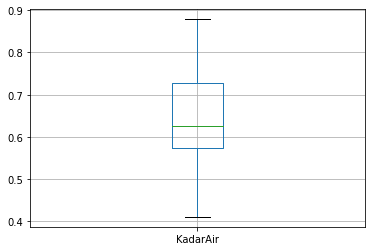

H0: miu1 - miu2 = d0
H1: miu1 - miu2 <> d0
Tingkat signifikan = 0.025
Daerah kritis : -26.957413098868866 < -1.96 atau -26.957413098868866 > 1.96
z = -26.957
pVal = 0.000000000000000
Keputusan : Hipotesis H0 ditolak


In [174]:
# b
sample1 = []
sample2 = []
i = 0

for line in datacsv['KadarAir']:
    if(i < 250):
        sample1.append(line)
    else:
        sample2.append(line)
    i += 1

a = 0.025
zA = 1.96
miu1 = np.mean(sample1)
miu2 = np.mean(sample2)
d0 = 0.2

sd1 = np.std(sample1)
sd2 = np.std(sample2)
n1 = len(sample1)
n2 = len(sample2)
temp = ((sd1**(2)/n1)) + (sd2**(2)/n2)

z = ((miu1 - miu2) - d0)/temp**(0.5)

datacsv.boxplot(['KadarAir'])
pylt.show()

## 
print("H0: miu1 - miu2 = d0")
print("H1: miu1 - miu2 <> d0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " <" + " -" + str(zA) + " atau " + str(z) + " > " + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.15f" % pVal)
print("Keputusan : ", end = '')

if(z < -zA or z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

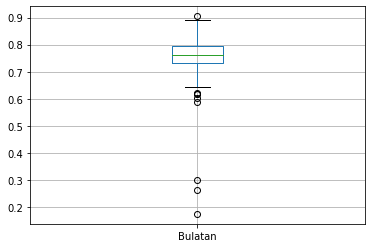

H0: miu1 - miu2 = d0
H1: miu1 - miu2 <> d0
Tingkat signifikan = 0.025
Daerah kritis : -3.4670136085431045 < -1.96 atau -3.4670136085431045 > 1.96
z = -3.467
pVal = 0.000263137622579
Keputusan : Hipotesis H0 ditolak


In [175]:
# c
sample1 = []
sample2 = []
i = 0

for line in datacsv['Bulatan']:
    if(i < 20):
        sample1.append(line)
    i += 1

j = 0
for line in datacsv['Bulatan']:
    if(j > 479 and j < 500):
        sample2.append(line)
    j += 1

a = 0.025
zA = 1.96
miu1 = np.mean(sample1)
miu2 = np.mean(sample2)
d0 = 0

sd1 = np.std(sample1)
sd2 = np.std(sample2)
n1 = len(sample1)
n2 = len(sample2)
temp = ((sd1**(2)/n1)) + (sd2**(2)/n2)

z = ((miu1 - miu2) - d0)/temp**(0.5)

datacsv.boxplot(['Bulatan'])
pylt.show()

print("H0: miu1 - miu2 = d0")
print("H1: miu1 - miu2 <> d0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " <" + " -" + str(zA) + " atau " + str(z) + " > " + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.15f" % pVal)
print("Keputusan : ", end = '')

if(z < -zA or z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

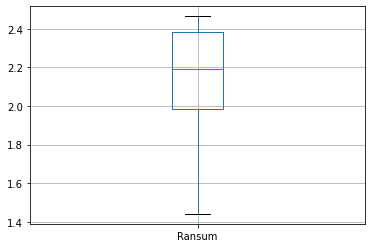

z = 13.397
pVal = 0.000
H0: miu1 - miu2 = d0
H1: miu1 - miu2 > d0
Tingkat signifikan = 0.05
Daerah kritis : 13.397486455610238 > 1.64
z = 13.397
pVal = 0.000000000000000
Keputusan : Hipotesis H0 ditolak


In [176]:
# d
sample1 = []
sample2 = []
i = 0

for line in datacsv['Ransum']:
    if(i < 250):
        sample1.append(line)
    else:
        sample2.append(line)
    i += 1

proporsi1 = []
proporsi2 = []
    
for line in sample1:
    if(line > 2):
        proporsi1.append(line)
        
for line in sample2:
    if(line > 2):
        proporsi2.append(line)
        
A = 0.05
zA = 1.64
        
x1 = len(proporsi1)
x2 = len(proporsi2)

n1 = len(sample1)
n2 = len(sample2)

p1 = x1 / n1
p2 = x2 / n2
pt = (x1 + x2) / (n1 + n2)
qt = 1 - pt

z = (p1 - p2)/(pt*qt*((1/n1) + (1/n2)))**(0.5)

datacsv.boxplot(['Ransum'])
pylt.show()

pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.3f" % pVal)

print("H0: miu1 - miu2 = d0")
print("H1: miu1 - miu2 > d0")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(z) + " > " + str(zA))
pVal = norm.sf(abs(z))
print("z = %.3f" % z)
print("pVal = %.15f" % pVal)
print("Keputusan : ", end = '')

if(z > zA):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

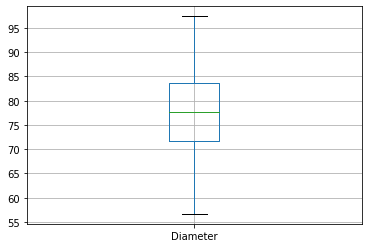

H0: var1 = var2
H1: var1 <> var2
Tingkat signifikan = 0.05
Daerah kritis : 1.083878022042188 < -1.2827228078241388 atau 1.083878022042188 > 0.7795916576054985
f = 1.083878022042188


AttributeError: 'numpy.float64' object has no attribute 'ppf'

In [185]:
# e
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pylt
import seaborn as sns
from scipy.stats import *
import math

sample1 = []
sample2 = []
i = 0

for line in datacsv['Diameter']:
    if(i < 250):
        sample1.append(line)
    else:
        sample2.append(line)
    i += 1

a = 0.025
s1 = np.var(sample1)
s2 = np.var(sample2)
v1 = len(sample1) - 1
v2 = len(sample2) - 1

fA1 = f.ppf(q=1-0.025, dfn=v1, dfd=v2)
fA2 = f.ppf(q=0.025, dfn=v1, dfd=v2)
f = s1/s2

datacsv.boxplot(['Diameter'])
pylt.show()

## Distribusi F
print("H0: var1 = var2")
print("H1: var1 <> var2")
print("Tingkat signifikan = " + str(A))
print("Daerah kritis : ", end = '')
print(str(f) + " <" + " -" + str(fA1) + " atau " + str(f) + " > " + str(fA2))
print("f = %.15f" % f)
print("Keputusan : ", end = '')
if(f < fA1 or f > fA2):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

Nilai korelasi Daerah dengan Kelas = -0.60
moderate negative linear relationship

Nilai korelasi SumbuUtama dengan Kelas = -0.71
strong negative linear relationship

Nilai korelasi SumbuKecil dengan Kelas = -0.15
weak negative linear relationship

Nilai korelasi Keunikan dengan Kelas = -0.73
strong negative linear relationship

Nilai korelasi AreaBulatan dengan Kelas = -0.61
moderate negative linear relationship

Nilai korelasi Diameter dengan Kelas = -0.60
moderate negative linear relationship

Nilai korelasi KadarAir dengan Kelas = 0.13
weak positive linear relationship

Nilai korelasi Keliling dengan Kelas = -0.63
moderate negative linear relationship

Nilai korelasi Bulatan dengan Kelas = 0.55
moderate positive linear relationship

Nilai korelasi Ransum dengan Kelas = -0.84
strong negative linear relationship

Nilai korelasi Kelas dengan Kelas = 1.00
perfect positive linear relationship



<Figure size 432x288 with 0 Axes>

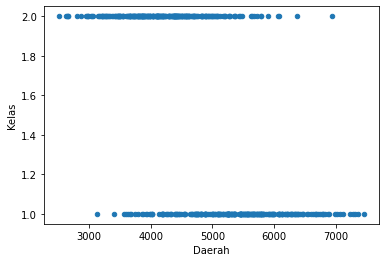

<Figure size 432x288 with 0 Axes>

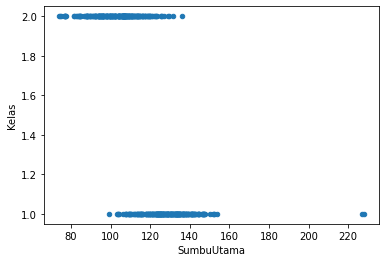

<Figure size 432x288 with 0 Axes>

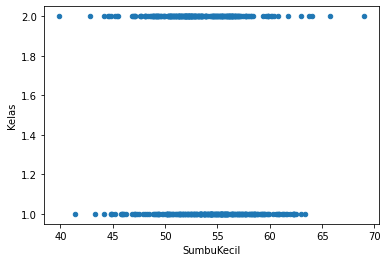

<Figure size 432x288 with 0 Axes>

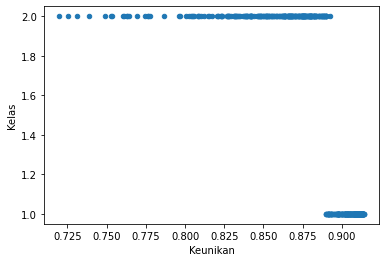

<Figure size 432x288 with 0 Axes>

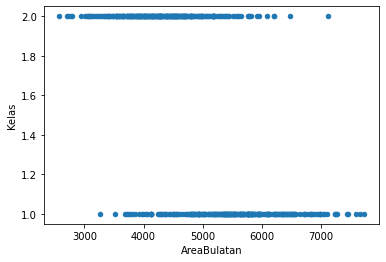

<Figure size 432x288 with 0 Axes>

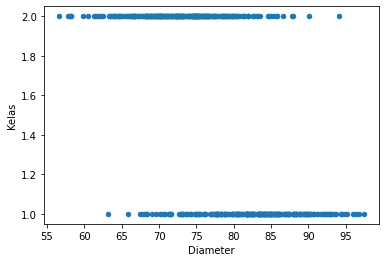

<Figure size 432x288 with 0 Axes>

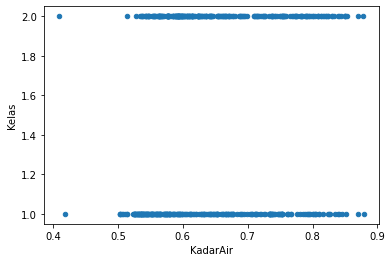

<Figure size 432x288 with 0 Axes>

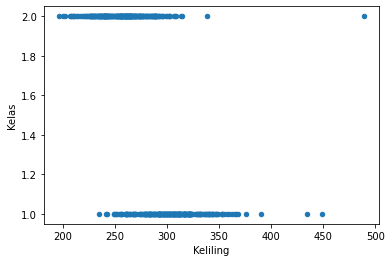

<Figure size 432x288 with 0 Axes>

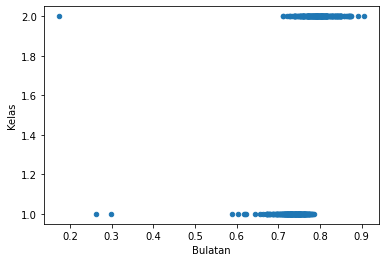

<Figure size 432x288 with 0 Axes>

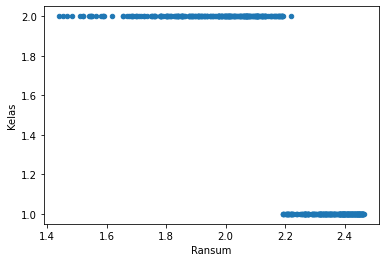

<Figure size 432x288 with 0 Axes>

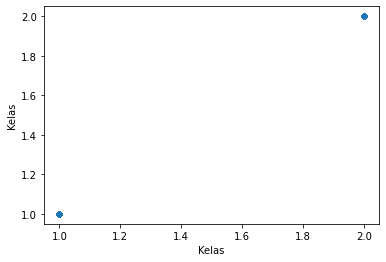

In [12]:
# Soal 6
for column in datacsv:
    pylt.figure()
    
    # menghitung nilai data korelasi
    temp = datacsv[column].corr(datacsv["Kelas"])
    
    print("Nilai korelasi", column, "dengan Kelas = %.2f" % temp)
    
    if(temp == 0):
        print("no linear relationship")
    elif(temp > 0):
        if(temp == 1):
            print("perfect positive linear relationship")
        elif(temp < 1 and temp >= 0.7):
            print("strong positive linear relationship")
        elif(temp < 0.7 and temp >= 0.3):
            print("moderate positive linear relationship")
        elif(temp < 0.3 and temp > 0):
            print("weak positive linear relationship")
    else:
        if(temp == -1):
            print("perfect negative linear relationship")
        elif(temp > -1 and temp <= -0.7):
            print("strong negative linear relationship")
        elif(temp > -0.7 and temp <= -0.3):
            print("moderate negative linear relationship")
        elif(temp > -0.3 and temp < 0):
            print("weak negative linear relationship")
    print()
    
    # membuat grafik plotnya
    datacsv.plot(kind="scatter", x=column, y="Kelas")